In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.calibration import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay , accuracy_score
import numpy as np
from matplotlib import pyplot as plt
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk

In [2]:
labeled_df = pd.read_csv('../../data/IMDB_dataset.csv')
labeled_df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
nltk.download('stopwords')
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /home/dhurba/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
def preprocess_text(text):
    text = text.encode('ascii', 'ignore').decode('ascii') #Remove emoji
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    words = text.split()  # Split into words
    words = [word for word in words if word not in stop_words]   # Remove stop words
    words = [stemmer.stem(word) for word in words]  # Stemming
    return ' '.join(words)

In [5]:
labeled_df['cleaned_text_with_stop_words_removal'] = labeled_df['review'].apply(preprocess_text)

In [6]:
labeled_df.isnull().sum()
null_rows = labeled_df[labeled_df['cleaned_text_with_stop_words_removal'].isnull()]
print("Rows with null values in 'cleaned_text_with_stop_words_removal':")
print(null_rows)
labeled_df.dropna(subset=['cleaned_text_with_stop_words_removal'], inplace=True)
duplicates_text = labeled_df.duplicated(subset=['cleaned_text_with_stop_words_removal'])
labeled_df[duplicates_text]

Rows with null values in 'cleaned_text_with_stop_words_removal':
Empty DataFrame
Columns: [review, sentiment, cleaned_text_with_stop_words_removal]
Index: []


,review,sentiment,cleaned_text_with_stop_words_removal
3537,Quite what the producers of this appalling ada...,negative,quit produc appal adapt tri imposs fathombr br...
3769,My favourite police series of all time turns t...,positive,favourit polic seri time turn tvfilm work ye g...
4391,"Beautiful film, pure Cassavetes style. Gena Ro...",positive,beauti film pure cassavet style gena rowland g...
6352,If you liked the Grinch movie... go watch that...,negative,like grinch movi go watch near good seussian m...
6479,I want very much to believe that the above quo...,negative,want much believ quot specif english subtitl t...
...,...,...,...
49912,This is an incredible piece of drama and power...,positive,incred piec drama power hit found film great g...
49950,This was a very brief episode that appeared in...,negative,brief episod appear one night galleri show bac...
49984,Hello it is I Derrick Cannon and I welcome you...,negative,hello derrick cannon welcom first ever cannoni...
49986,This movie is a disgrace to the Major League F...,negative,movi disgrac major leagu franchis live minneso...


In [7]:
def Vectorize(text):

    tfidf = TfidfVectorizer(max_features=5000,ngram_range=(1,1))

    # Fit and transform the labeled data
    return tfidf.fit_transform(text)

In [8]:
X_labeled = Vectorize(labeled_df['cleaned_text_with_stop_words_removal'])
print(X_labeled)
label_encoder = LabelEncoder()
y_labeled = label_encoder.fit_transform(labeled_df['sentiment'])
print(y_labeled)

  (np.int32(0), np.int32(3128))	0.02247093778195993
  (np.int32(0), np.int32(3698))	0.053024179355328514
  (np.int32(0), np.int32(2822))	0.056355257217840994
  (np.int32(0), np.int32(4829))	0.08675183148996689
  (np.int32(0), np.int32(3186))	0.4780416067986378
  (np.int32(0), np.int32(1543))	0.11346507161733896
  (np.int32(0), np.int32(4988))	0.05846179414736371
  (np.int32(0), np.int32(2185))	0.07919868233341627
  (np.int32(0), np.int32(3721))	0.09126313207043575
  (np.int32(0), np.int32(1591))	0.06186902423825842
  (np.int32(0), np.int32(2063))	0.04556791953303429
  (np.int32(0), np.int32(2801))	0.08207752328728264
  (np.int32(0), np.int32(593))	0.06604560543908579
  (np.int32(0), np.int32(1742))	0.06865968440317753
  (np.int32(0), np.int32(4474))	0.034874212105604964
  (np.int32(0), np.int32(4276))	0.1791088804981793
  (np.int32(0), np.int32(640))	0.0733583550072902
  (np.int32(0), np.int32(3847))	0.03372632690870984
  (np.int32(0), np.int32(4768))	0.25356262514402
  (np.int32(0), n

In [9]:
def train_predict_plot(X_train, X_test, y_train, y_test, split):
    # Train Naive Bayes model
    nb_model = MultinomialNB()
    nb_model.fit(X_train, y_train)
    nb_predictions = nb_model.predict(X_test)
    nb_conf_matrix = confusion_matrix(y_test, nb_predictions, labels=np.unique(y_test))
    nb_accuracy = accuracy_score(y_test, nb_predictions)
    
    # Train SVM model
    svm_model = SVC(kernel='linear')
    svm_model.fit(X_train, y_train)
    svm_predictions = svm_model.predict(X_test)
    svm_accuracy = accuracy_score(y_test, svm_predictions)
    svm_conf_matrix = confusion_matrix(y_test, svm_predictions, labels=np.unique(y_test))
    svm_accuracy = accuracy_score(y_test, svm_predictions)
    

    # Plot confusion matrices
    def plot_confusion_matrix(cm, model_name, accuracy,labels):
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
        disp.plot(cmap=plt.cm.Blues, values_format='d')
        plt.title(f'Confusion Matrix for {model_name} (Train-Test Split: {split*100}-{(100-split*100)})')
        plt.suptitle(f'Accuracy: {accuracy:.2f}', fontsize=12, y=0.97) 
        # plt.text(0.5, -0.1, f'Accuracy: {accuracy:.2f}', ha='center', va='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))
        plt.savefig(f'../../reports/imdb/confusion_matrix_{model_name}_{split*100}_{100-split*100}.png', bbox_inches='tight')
        plt.show()

    plot_confusion_matrix(svm_conf_matrix, f'SVM',svm_accuracy, np.unique(y_test))
    plot_confusion_matrix(nb_conf_matrix, f'Naive Bayes',nb_accuracy, np.unique(y_test))
    


In [10]:
from imblearn.over_sampling import SMOTE



# # Split the labeled data into training and test sets
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_labeled, y_labeled)
# X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, stratify= y_resampled, test_size=0.2,random_state=42)

# print("Shape of X_resampled:", X_resampled.shape)
# print("Length of y_resampled:", len(y_resampled))
# print("X_train shape:", X_train.shape)
# print("X_test shape:", X_test.shape)
# print("y_train length:", len(y_train))
# print("y_test length:", len(y_test))
# countpositive = 0
# countnegative=0
# countneutral=0


# for data in y_train:
#     # print(data)
#     if data == 2:
#         countpositive = countpositive +1
#     elif data == 0:
#         countnegative = countnegative +1
#     else:
#         countneutral = countneutral +1


# print(countpositive,countnegative,countneutral)

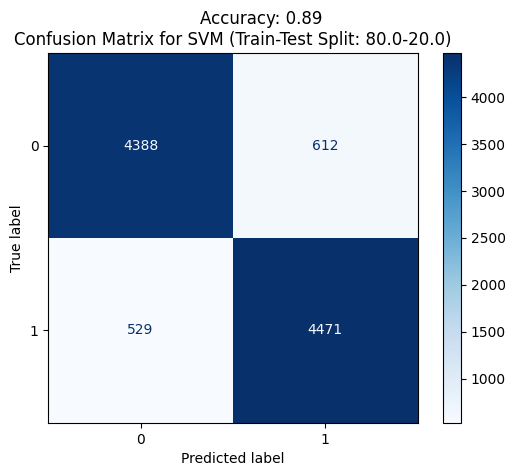

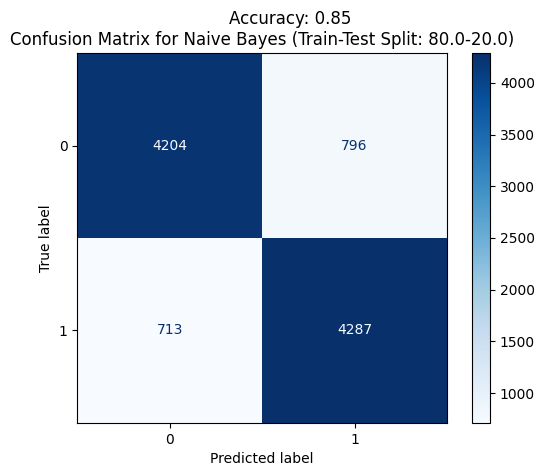

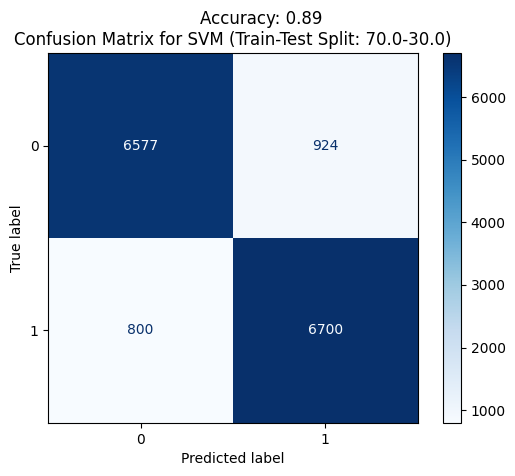

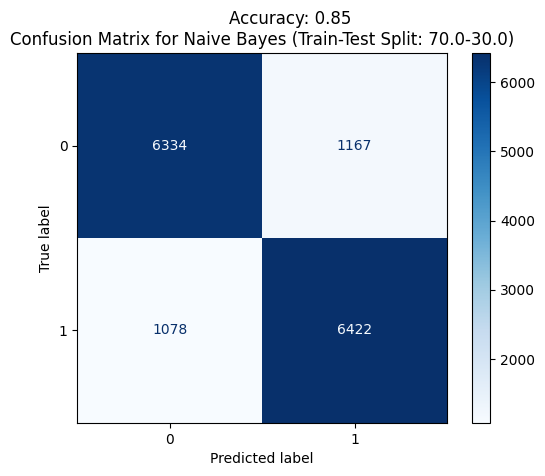

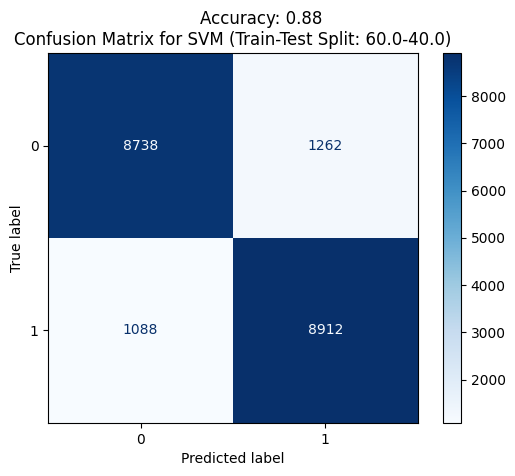

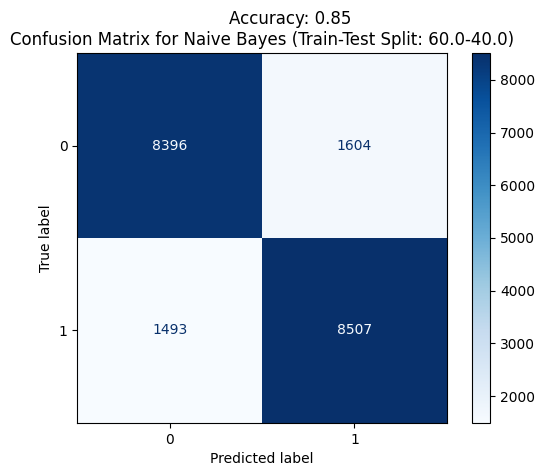

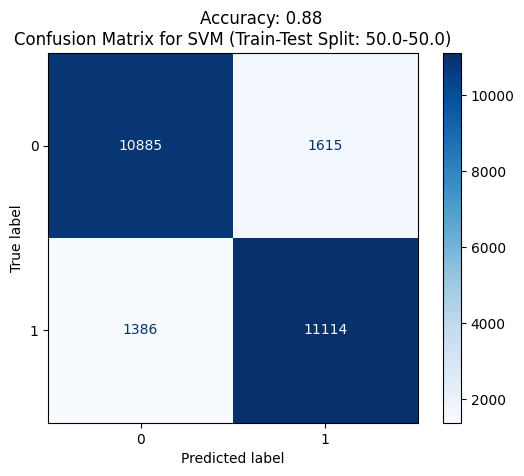

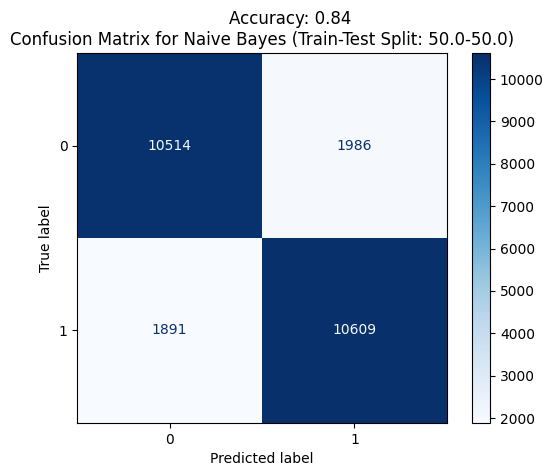

In [11]:
splits = [0.8, 0.7, 0.6, 0.5]
for split in splits:
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, stratify= y_resampled, test_size=(1-split),random_state=42)
    # X_train, X_test, y_train, y_test = train_test_split(X_labeled, y_labeled, test_size=(1-split),stratify= y_labeled, random_state=42)
    train_predict_plot(X_train, X_test, y_train, y_test, split)